Minimum Independent Dominating Set: (2, 3)


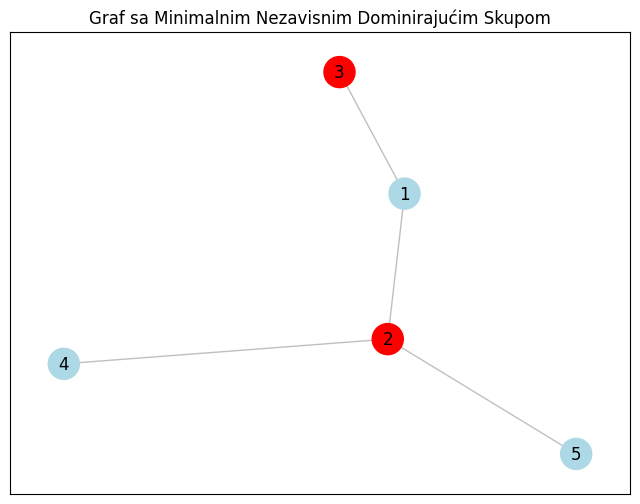

In [5]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

# Funkcija za proveru da li je skup nezavisni
def is_independent_set(graph, subset):
    for u, v in itertools.combinations(subset, 2):
        if graph.has_edge(u, v):
            return False
    return True

# Funkcija za proveru da li je skup dominantan
def is_dominating_set(graph, subset):
    dominating_nodes = set(subset)
    for node in subset:
        dominating_nodes.update(graph.neighbors(node))
    dominating_nodes.update(subset)
    return len(dominating_nodes) == len(graph.nodes)

# Brute Force za Minimum Independent Dominating Set
def brute_force_mids(graph):
    nodes = list(graph.nodes)
    n = len(nodes)
    min_set = None
    
    for r in range(1, n + 1):
        for subset in itertools.combinations(nodes, r):
            if is_independent_set(graph, subset) and is_dominating_set(graph, subset):
                if min_set is None or len(subset) < len(min_set):
                    min_set = subset
                    
    return min_set

# Funkcija za crtanje grafova
def draw_graph(graph, min_set=None):
    pos = nx.spring_layout(graph)  
    plt.figure(figsize=(8, 6)) 
    
    nx.draw_networkx_edges(graph, pos, edge_color='gray', alpha=0.5)
    
    node_color = 'lightblue'
    if min_set is not None:
        node_color = [('red' if node in min_set else 'lightblue') for node in graph.nodes]
    
    nx.draw_networkx_nodes(graph, pos, node_color=node_color, node_size=500)
    
    nx.draw_networkx_labels(graph, pos)
    
    plt.title("Graf sa Minimalnim Nezavisnim Dominirajućim Skupom")
    plt.show()

if __name__ == "__main__":
    G = nx.Graph()
    G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5)])

    mids = brute_force_mids(G)
    print("Minimum Independent Dominating Set:", mids)
    
    draw_graph(G, min_set=mids)
